In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import os
from importlib import reload

In [2]:
import Params; reload(Params)
import EoM; reload(EoM)
from EoM import derivAve

nM = Params.nM
tfinal = Params.tfinal; tau = Params.tau
metab = np.zeros(21)

metab[-7] = Params.gcyt
metab[-6] = Params.hcyt
metab[-5] = Params.pcyt
metab[-4] = Params.icyt
metab[-3] = Params.acyt
metab[5] = Params.nmcp
metab[6] = Params.dmcp

t = np.linspace(0,tfinal,3000); Rc = Params.Rc
'''This is the actual integration using the equations of motion and the desired discretization'''
sol = odeint(derivAve,metab,t)


Glycerol --> 1,3-PDO reaction:

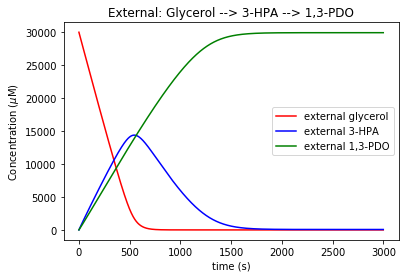

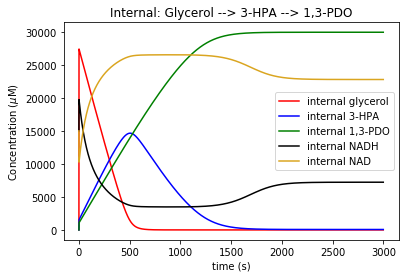

In [4]:
#external
outside, = plt.plot(t*tau/Params.epsilon1, sol[:,-7]*Params.Kmdhab, color = 'red', label = 'external glycerol')
outside2, = plt.plot(t*tau/Params.epsilon1, sol[:,-6]*Params.Kmdhat_H, color = 'blue', label = 'external 3-HPA')
outside3, = plt.plot(t*tau/Params.epsilon1, sol[:,-5]*Params.Kmdhat_P,color = 'green', label = 'external 1,3-PDO')
plt.xlabel('time (s)'); plt.ylabel('Concentration ($\mu$M)')
plt.title("External: Glycerol --> 3-HPA --> 1,3-PDO"); plt.legend(handles = [outside, outside2, outside3,])
#plt.savefig('externalConcentration.png')
plt.show()

#internal
#sol = odeint(derivAve,metab,t)
inside, = plt.plot(t*tau/Params.epsilon1, sol[:,0]*Params.Kmdhab, color = 'red', label = 'internal glycerol')
inside2, = plt.plot(t*tau/Params.epsilon1, sol[:,1]*Params.Kmdhat_H, color = 'blue', label = 'internal 3-HPA')
inside3, = plt.plot(t*tau/Params.epsilon1, sol[:,2]*Params.Kmdhat_P,color = 'green', label = 'internal 1,3-PDO')
inside6, = plt.plot(t*tau/Params.epsilon1, sol[:,5]*Params.Kmdhat_N,color = 'black', label = 'internal NADH')
inside7, = plt.plot(t*tau/Params.epsilon1, sol[:,6]*Params.Kmdhat_D, color = 'goldenrod', label = 'internal NAD')
plt.xlabel('time (s)'); plt.ylabel('Concentration ($\mu$M)')
plt.title("Internal: Glycerol --> 3-HPA --> 1,3-PDO"); plt.legend(handles = [inside, inside2, inside3, inside6, inside7,])
#plt.savefig('externalConcentration.png')
plt.show()


Isocitrate --> alpha-ketoglutarate reaction:

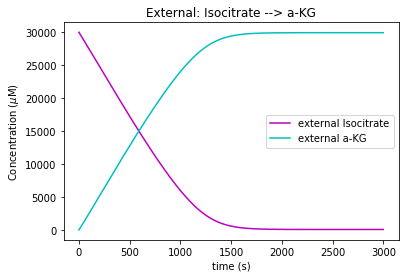

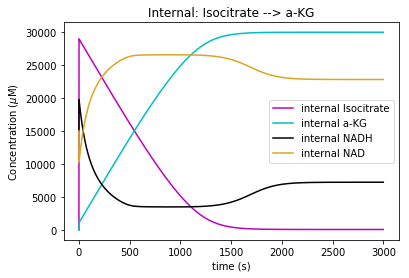

In [5]:
#external
outside4, = plt.plot(t*tau/Params.epsilon1, sol[:,-4]*Params.Kmicde_I, color = 'm', label = 'external Isocitrate')
outside5, = plt.plot(t*tau/Params.epsilon1, sol[:,-3]*Params.Kmicde_A, color = 'c', label = 'external a-KG')
plt.xlabel('time (s)'); plt.ylabel('Concentration ($\mu$M)')
plt.title("External: Isocitrate --> a-KG"); plt.legend(handles = [outside4, outside5,])
#plt.savefig('externalConcentration.png')
plt.show()

#internal
inside4, = plt.plot(t*tau/Params.epsilon1, sol[:,3]*Params.Kmicde_I, color = 'm', label = 'internal Isocitrate')
inside5, = plt.plot(t*tau/Params.epsilon1, sol[:,4]*Params.Kmicde_A, color = 'c', label = 'internal a-KG')
inside6, = plt.plot(t*tau/Params.epsilon1, sol[:,5]*Params.Kmdhat_N,color = 'black', label = 'internal NADH')
inside7, = plt.plot(t*tau/Params.epsilon1, sol[:,6]*Params.Kmdhat_D, color = 'goldenrod', label = 'internal NAD')
plt.xlabel('time (s)'); plt.ylabel('Concentration ($\mu$M)')
plt.title("Internal: Isocitrate --> a-KG"); plt.legend(handles = [inside4, inside5, inside6, inside7,])
#plt.savefig('externalConcentration.png')
plt.show()

Plot of all reactions external:

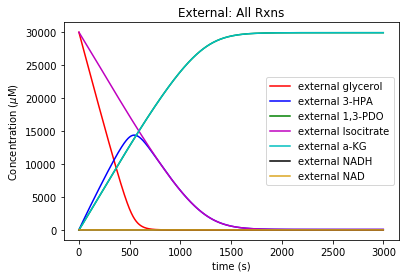

In [6]:
#%matplotlib notebook
#external
alloutside, = plt.plot(t*tau/Params.epsilon1, sol[:,-7]*Params.Kmdhab, color = 'red', label = 'external glycerol')
alloutside2, = plt.plot(t*tau/Params.epsilon1, sol[:,-6]*Params.Kmdhat_H, color = 'blue', label = 'external 3-HPA')
alloutside3, = plt.plot(t*tau/Params.epsilon1, sol[:,-5]*Params.Kmdhat_P,color = 'green', label = 'external 1,3-PDO')
alloutside4, = plt.plot(t*tau/Params.epsilon1, sol[:,-4]*Params.Kmicde_I, color = 'm', label = 'external Isocitrate')
alloutside5, = plt.plot(t*tau/Params.epsilon1, sol[:,-3]*Params.Kmicde_A, color = 'c', label = 'external a-KG')
alloutside6, = plt.plot(t*tau/Params.epsilon1, sol[:,-2]*Params.Kmdhat_N,color = 'black', label = 'external NADH')
alloutside7, = plt.plot(t*tau/Params.epsilon1, sol[:,-1]*Params.Kmdhat_D, color = 'goldenrod', label = 'external NAD')
plt.xlabel('time (s)'); plt.ylabel('Concentration ($\mu$M)'); plt.title("External: All Rxns")
plt.legend(handles = [alloutside, alloutside2, alloutside3, alloutside4, alloutside5, alloutside6, alloutside7,])
#plt.savefig('externalConcentration.png')
plt.show()


Plot of all reactions internal:

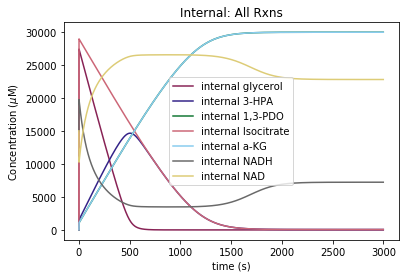

In [7]:
#%matplotlib notebook
#internal
allinside, = plt.plot(t*tau/Params.epsilon1, sol[:,0]*Params.Kmdhab, color = '#882255', label = 'internal glycerol')
allinside2, = plt.plot(t*tau/Params.epsilon1, sol[:,1]*Params.Kmdhat_H, color = '#332288', label = 'internal 3-HPA')
allinside3, = plt.plot(t*tau/Params.epsilon1, sol[:,2]*Params.Kmdhat_P,color = '#117733', label = 'internal 1,3-PDO')
allinside4, = plt.plot(t*tau/Params.epsilon1, sol[:,3]*Params.Kmicde_I, color = '#CC6677', label = 'internal Isocitrate')
allinside5, = plt.plot(t*tau/Params.epsilon1, sol[:,4]*Params.Kmicde_A, color = '#88CCEE', label = 'internal a-KG')
allinside6, = plt.plot(t*tau/Params.epsilon1, sol[:,5]*Params.Kmdhat_N,color = 'dimgrey', label = 'internal NADH')
allinside7, = plt.plot(t*tau/Params.epsilon1, sol[:,6]*Params.Kmdhat_D, color = '#DDCC77', label = 'internal NAD')

plt.xlabel('time (s)'); plt.ylabel('Concentration ($\mu$M)'); plt.title('Internal: All Rxns')
plt.legend(handles = [allinside, allinside2, allinside3, allinside4, allinside5, allinside6, allinside7,])
#plt.savefig('externalConcentration.png')
plt.show()

Sensitivity Analysis:

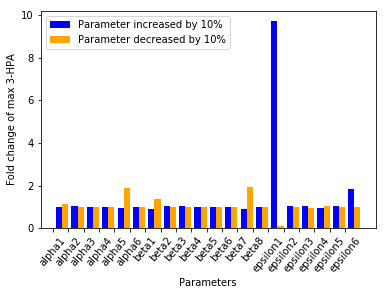

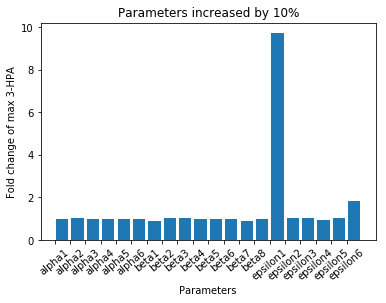

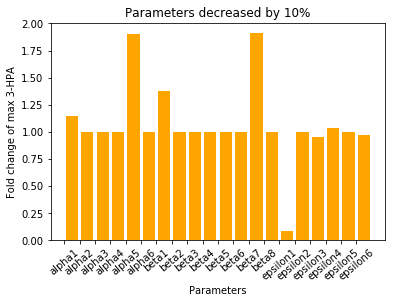

In [8]:
original = 56205.82093414031
inc = [54704.819351396734,57885.18341928179,56256.771475804104,56319.81583930879,54339.50625682306,56367.577806137764,51321.6934842113,57815.78119713485,57453.54796060585,56228.445200785456,56515.977489189136,56205.82093414031,50007.3853992075,56380.75521202987,546781.6607067802,57290.412948174904,58342.02625554044,53745.11384131874,57480.77890120839,103491.89938409104]
dec = [64272.30165008362,55936.77010083541,56166.85019138886,56159.64688713572,106995.20253433089,56154.64617194509,77453.54408926249,55949.30784084481,56043.290935394434,56169.24701355021,56140.551466002704,56171.48877064921,107464.35289277742,56153.23064872867,4782.059743419839,56043.438032476166,53741.30952897889,58339.96482160827,56015.85382924237,54619.33746913157]
xlabels = ['alpha1','alpha2','alpha3','alpha4','alpha5','alpha6','beta1','beta2','beta3','beta4','beta5','beta6','beta7','beta8','epsilon1','epsilon2','epsilon3','epsilon4','epsilon5','epsilon6']
foldinc = []
folddec = []
for i in inc:
    a = i/original
    foldinc.append(a)
for i in dec:
    b = i/original
    folddec.append(b)

fig, ax = plt.subplots();index = np.arange(20);width=0.4
incr = plt.bar(index,foldinc,width,color='b',label='Parameter increased by 10%')
dec = plt.bar(index+width,folddec,width,color='orange',label='Parameter decreased by 10%')
plt.xlabel('Parameters')
plt.ylabel('Fold change of max 3-HPA')
plt.xticks(index-width,xlabels,rotation=50)
plt.legend(handles=[incr, dec]);
plt.show()
print()
index = np.arange(20)
plt.bar(index,foldinc)
plt.xlabel('Parameters');plt.ylabel('Fold change of max 3-HPA')
plt.xticks(index-0.5,xlabels,rotation=40);plt.title('Parameters increased by 10%');plt.show()
print()
plt.bar(index,folddec,color='orange')
plt.xlabel('Parameters');plt.ylabel('Fold change of max 3-HPA')
plt.xticks(index-0.5,xlabels,rotation=40);plt.title('Parameters decreased by 10%');plt.show()

